In [1]:
import allel
import h5py
import ingenos
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
%matplotlib inline

In [2]:
base_dir = "../../../data/amplicon_sequencing/funestus/"

In [3]:
data_OA = pd.read_excel(base_dir + "table_S3.xlsx")

data_OA.head()

,Inversion,AfunF3 Position,Ref,Alt,Forward Primer (5'>3'),Reverse Primer (5'>3'),Probe_Ref (5'>3'),Probe_Alt (5'>3')
0,3Ra,2006341,C,T,ACTTTCTTCTACACACGTGTGGTT,TCCAATCGAGAAACAAAGATGTTACCA,ACGTTAGCTGTAGGTCCGAA,CGTTAGCTGTAGATCCGAA
1,3Ra,2053347,T,G,GTAGAGAGACATTGATGGGTGGAAA,CACTGCAGGCCGGATGT,CGATTCTGGAGATTTTTAAT,ATTCTGGAGCTTTTTAAT
2,3Ra,2094697,C,G,GCTGGACTGATGACAGAAACGT,TGTCAGACAGTCAGAACCACAAAAT,CGATACCTTCAGCACCGC,CGATACCTTCACCACCGC
3,3Ra,2099165,A,T,CGTCTTGGTCGGCTTCCT,GGCAAACAACGTAGACTCAAACC,CGATATCACAACACCATTC,CGATATCACAACTCCATTC
4,3Ra,2486161,A,C,GGGATAACGGACTCGGTAAACT,TCTGTCAGGCGACCAATAAGC,CCTCCGCATCACCCA,CCTCCGCCTCACCCA


In [4]:
data_OA.shape

(27, 8)

In [5]:
data_OA.tail()

,Inversion,AfunF3 Position,Ref,Alt,Forward Primer (5'>3'),Reverse Primer (5'>3'),Probe_Ref (5'>3'),Probe_Alt (5'>3')
22,3Rb,28550180,C,T,GAGATGGATGTAAAGTGAGGTTAGCA,GCTGGTCACTGCAGAAATCATCA,CTTTTCTTTCCATTTTTG,TTCTTTTCTTTCTATTTTTG
23,3Rb,28554164,T,C,CCACTCGATTTAATCAATTGTCCTTTTACTT,CTGGTTTGTTGCGTTATTCGATACT,TCCCGGACTTATCTGC,CCGGACCTATCTGC
24,3Rb,29210802,A,T,GAAACGCTCACGTCATGCAATATAA,ATCGTGTACGATTCTTGCCTAAACT,AGATGCCGCTCGAGTAT,ATGCCGCACGAGTAT
25,3Rb,30037802,C,G,ACTACATTAGCTAGAAAAATGGTCTTAAATCAC,CGGTTTCGTTTTCGGTTTGC,CCTAGAACGCCAAAGTA,CTAGAACGGCAAAGTA
26,3Rb,30661948,T,C,AAATTTCGAACTGCAAACCGTGAA,CGTCCACAGAACGTGAAATGATAAA,CTGTTTAGTAAATTGAAACTT,TGTTTAGTAAATCGAAACTT


In [6]:
data_AS = pd.read_excel(base_dir + "table_S4.xlsx")

data_AS.head()

,Inversion,Tag SNP,REF,ALT,Primer_F Name,Primer_F Sequence (5'>3'),Primer_R Name,Primer_R Sequence (5'>3')
0,2Ra,2R_26087506_a,G,A,2R_26087506_a_F,CTACACGTTCAGAGTTCTACAGTCCGAACCGATGTATTGGGCTCTGC,2R_26087506_a_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTACATTCGAACAC...
1,2Ra,2R_26111277_a,A,T,2R_26111277_a_F,CTACACGTTCAGAGTTCTACAGTCCGAACAACGAGGCATTGAAAAAAGC,2R_26111277_a_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTTCTGTCTCTCAC...
2,2Ra,2R_26212609_a,G,T,2R_26212609_a_F,CTACACGTTCAGAGTTCTACAGTCCGATGCATTCGATGTTTAGTGCGG,2R_26212609_a_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTGCTCGCTGGACG...
3,2Ra,2R_26213556_a,A,G,2R_26213556_a_F,CTACACGTTCAGAGTTCTACAGTCCGAAACGATATCACCGCCCAAAC,2R_26213556_a_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTTGCAAGCAACTG...
4,2Ra,2R_26558370_a,T,C,2R_26558370_a_F,CTACACGTTCAGAGTTCTACAGTCCGAACCCAGAATCGAAACGGCTT,2R_26558370_a_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTCCTCATGGCTGG...


In [7]:
data_AS.shape

(82, 8)

In [8]:
data_AS.tail()

,Inversion,Tag SNP,REF,ALT,Primer_F Name,Primer_F Sequence (5'>3'),Primer_R Name,Primer_R Sequence (5'>3')
77,3Rb,3R_30902012_b,G,T,3R_30902012_b_F,CTACACGTTCAGAGTTCTACAGTCCGAACGATTAGTAGTCGGCGCAA,3R_30902012_b_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTGCTGCTACTACT...
78,3Rb,3R_31397626_b,C,T,3R_31397626_b_F,CTACACGTTCAGAGTTCTACAGTCCGATGAGAGCGTTGCCTGGTAAG,3R_31397626_b_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTGTTTGGAGAATG...
79,3Rb,3R_31568791_b,A,T,3R_31568791_b_F,CTACACGTTCAGAGTTCTACAGTCCGATGAACATTCGTTTCGCTCGA,3R_31568791_b_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTGCATAAAGGCAC...
80,3Rb,3R_32435459_b,A,C,3R_32435459_b_F,CTACACGTTCAGAGTTCTACAGTCCGAACGAACCCAGTCAGCACATT,3R_32435459_b_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTACAACAAACCCG...
81,3Rb,3R_32492194_b,A,G,3R_32492194_b_F,CTACACGTTCAGAGTTCTACAGTCCGATGTAAAACGTACCATTTGA...,3R_32492194_b_R,GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTCGGAGTCATAGT...


##### get the actual positions for amplicon sequencing

In [9]:
data_AS["pos"] =\
[int(item[1]) for item in data_AS["Tag SNP"].str.split("_")]

In [10]:
data_AS[["Inversion", "Tag SNP", "pos"]].head()

,Inversion,Tag SNP,pos
0,2Ra,2R_26087506_a,26087506
1,2Ra,2R_26111277_a,26111277
2,2Ra,2R_26212609_a,26212609
3,2Ra,2R_26213556_a,26213556
4,2Ra,2R_26558370_a,26558370


In [11]:
AS = data_AS.loc[:, ["Inversion", "pos"]]
AS["type"] = "AS"
AS.head()

,Inversion,pos,type
0,2Ra,26087506,AS
1,2Ra,26111277,AS
2,2Ra,26212609,AS
3,2Ra,26213556,AS
4,2Ra,26558370,AS


In [12]:
AS.shape

(82, 3)

In [13]:
OA = data_OA.loc[:, ["Inversion", "AfunF3 Position"]]
OA.rename(columns = {"AfunF3 Position" : "pos"}, inplace=True)
OA["type"] = "OA"
OA.head()

,Inversion,pos,type
0,3Ra,2006341,OA
1,3Ra,2053347,OA
2,3Ra,2094697,OA
3,3Ra,2099165,OA
4,3Ra,2486161,OA


In [14]:
OA.shape

(27, 3)

In [15]:
both = pd.concat([AS, OA])

both.reset_index(drop=True, inplace=True)

both.head()

,Inversion,pos,type
0,2Ra,26087506,AS
1,2Ra,26111277,AS
2,2Ra,26212609,AS
3,2Ra,26213556,AS
4,2Ra,26558370,AS


##### figure 1

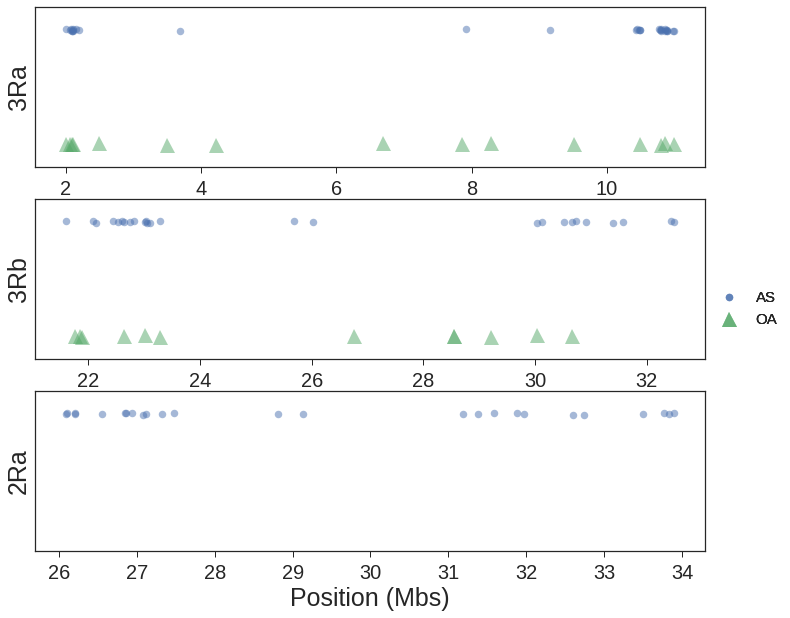

In [16]:
height_dict = {"AS" : 0.5, "OA" : 0}
marker_dict = {"AS" : ".", "OA" : "^"}

fig, axes = plt.subplots(nrows = 3, ncols=1,figsize = (12, 10))

for i, ax in enumerate(axes):
    inversion = ["3Ra", "3Rb", "2Ra"][i] 

    chunk = both.loc[both["Inversion"] == inversion, :]
    
    for j, dtype in enumerate(chunk["type"].unique()):

        type_chunk = chunk.loc[chunk["type"] == dtype, :]

        height = height_dict[dtype]
        
        ax.plot(type_chunk["pos"] / 1000000, 
                np.random.uniform(height - .005, height + .005,
                                  [len(type_chunk)]), 
                linestyle = ' ', marker = marker_dict[dtype], label = dtype, 
                markersize=15, alpha = 0.5)            
         
    ax.ticklabel_format(useOffset=False, style="plain")
    ax.set_ylim(-.1, 0.6)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.set_ylabel(inversion, fontsize=25)
    
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
    
    if i == 2:
        
            ax.set_xlabel('Position (Mbs)', fontsize=25)
    
    fig.legend(handles, labels, loc='center right', fancybox= True, framealpha=0.5, 
               fontsize = 15)

#plt.savefig(ingenos.make_date_stamp("../results/SNP_locations"))

##### figure 2

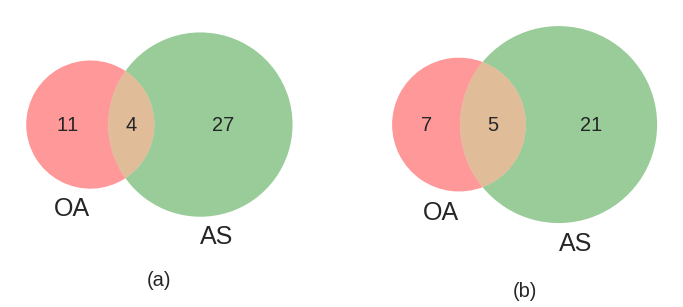

In [17]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

p1 = venn2([set(OA.loc[OA["Inversion"] == "3Ra", "pos"].values),
       set(AS.loc[AS["Inversion"] == "3Ra", "pos"].values)], 
      set_labels=('OA', 'AS'), ax = axes[0])

for text in p1.set_labels:
    text.set_fontsize(25)

for text in p1.subset_labels: 
    text.set_fontsize(20)

p2 = venn2([set(OA.loc[OA["Inversion"] == "3Rb", "pos"].values), 
       set(AS.loc[AS["Inversion"] == "3Rb", "pos"].values)], 
      set_labels=('OA', 'AS'), ax = axes[1])

for text in p2.set_labels:
    text.set_fontsize(25)

for text in p2.subset_labels: 
    text.set_fontsize(20)

axes[0].set_title("(a)", y=-.25, fontsize = 20)
axes[1].set_title("(b)", y=-.25, fontsize = 20)

outString = ingenos.make_date_stamp("../results/funestus_Venn_diagrams")

#plt.savefig(outString, bbox_inches="tight");